In [1]:
import numpy as np
import pandas as pd
import glob

In [5]:
sample_idx = 0
for filename in glob.glob('/home/garner1/pipelines/WSI-analysis/SG/pipeline/data/tcga.detection/*.gz')[:3]:
    if sample_idx == 0:
        df = pd.read_csv(filename,sep='\t')
        features = df.columns[np.r_[0, 7:18]]
        df_pool = df[features]
    else:
        df = pd.read_csv(filename,sep='\t')
        df_summary = df[features]
        df_pool = pd.concat([df_pool, df_summary], ignore_index=True)
    print(sample_idx,df_pool.shape)
    sample_idx += 1

0 (2059988, 12)
1 (5227011, 12)
2 (6192228, 12)


In [6]:
df_pool.to_pickle("./pooled_measurements.pkl")

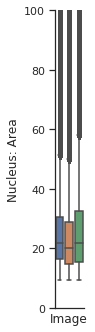

In [4]:
import seaborn as sns
sns.set(style="ticks")
g = sns.catplot(x="Image", y=df_pool.columns[1], data=df_pool, kind='box')
g.set(ylim=(0, 100))
g.set(xticks=[])